## Análisis procesos de Contratación Estatal - Colombia - Año 2015 - a la fecha 2020 

## 1. Analisis con Pandas, Numpy y Matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.rcParams["figure.figsize"] = [19.0, 9.0]
plt.style.use('ggplot')

Datos tomados de https://www.datos.gov.co/Gastos-Gubernamentales/SECOP-II-Procesos-de-Contrataci-n/p6dx-8zbt/data

In [3]:
#adjuntamos la base de datos 
contratos = pd.read_csv('SECOP_II_-_Procesos_de_Contratacion-2015-2020.csv')

In [4]:
#DataFrame
contratos

,Entidad,Nit Entidad,Departamento Entidad,Ciudad Entidad,OrdenEntidad,Entidad Centralizada,ID del Proceso,Referencia del Proceso,PCI,ID del Portafolio,...,Valor Total Adjudicacion,Nombre del Adjudicador,Nombre del Proveedor Adjudicado,NIT del Proveedor Adjudicado,Codigo Principal de Categoria,Estado de Apertura del Proceso,Tipo de Contrato,Subtipo de Contrato,Categorias Adicionales,URLProceso
0,SUPERINTENDENCIA DE VIGILANCIA Y SEGURIDAD PRI...,800217123,Distrito Capital de Bogotá,Bogotá,Nacional,Si,CO1.REQ.1090917,CDPS-018-2020_2,15-16-00,CO1.BDOS.1054442,...,0,No Adjudicado,No Adjudicado,No Adjudicado,V1.80111701,Abierto,Servicios de aprovisionamiento,No Especificado,ND,https://community.secop.gov.co/Public/Tenderin...
1,SECRETARÍA GENERAL DE LA ALCALDÍA MAYOR DE BOGOTÁ,899999061,No Definido,No Definido,Territorial,No,CO1.REQ.1116938,SGA-CD-151-2020_2,ND,CO1.BDOS.1077727,...,0,No Adjudicado,No Adjudicado,No Adjudicado,V1.80101604,Abierto,Servicios de aprovisionamiento,No Especificado,ND,https://community.secop.gov.co/Public/Tenderin...
2,ESE HOSPITAL SAN RAFAEL DE FUSAGASUGÁ,890680025,No Definido,No Definido,Territorial,Si,CO1.REQ.713563,506-2019,ND,CO1.BDOS.692469,...,0,No Adjudicado,No Adjudicado,No Adjudicado,V1.93141507,Abierto,Servicios de aprovisionamiento,No Especificado,ND,https://community.secop.gov.co/Public/Tenderin...
3,EMPRESA DE TRANSPORTE DEL TERCER MILENIO TRANS...,830063506,Distrito Capital de Bogotá,Bogotá,Territorial,Si,CO1.REQ.465604,TMSA-CD-276-2018,ND,CO1.BDOS.449604,...,0,No Adjudicado,No Adjudicado,No Adjudicado,V1.80111600,Abierto,Servicios de aprovisionamiento,No Especificado,ND,https://community.secop.gov.co/Public/Tenderin...
4,AGENCIA NACIONAL DEL ESPECTRO,900334265,Distrito Capital de Bogotá,Bogotá,Nacional,Si,CO1.REQ.190427,CD-59 de 2017,23-09-00,CO1.BDOS.186522,...,"4,174,044",Dora Vega,SGS COLOMBIA SAS,860049921,V1.80101500,Abierto,Servicios de aprovisionamiento,No Especificado,ND,https://community.secop.gov.co/Public/Tenderin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490098,SUPERINTENDENCIA DE SERVICIOS PÚBLICOS DOMICIL...,800250984,No Definido,No Definido,Nacional,No,CO1.REQ.773738,085002519,03-24-00,CO1.BDOS.752044,...,0,No Adjudicado,No Adjudicado,No Adjudicado,V1.80111620,Abierto,Servicios de aprovisionamiento,No Especificado,ND,https://community.secop.gov.co/Public/Tenderin...
490099,MINISTERIO DEL INTERIOR,830114475,No Definido,No Definido,Nacional,No,CO1.REQ.650468,PS 2016 DE 2018,37-01-01-000,CO1.BDOS.629401,...,0,No Adjudicado,No Adjudicado,No Adjudicado,V1.80111600,Abierto,Servicios de aprovisionamiento,No Especificado,ND,https://community.secop.gov.co/Public/Tenderin...
490100,ALCALDÌA DE SANTIAGO CALI - SECRETARIA DE PAZ ...,890399011,No Definido,No Definido,Territorial,Si,CO1.REQ.725134,4164.010.32.1.064-2019,ND,CO1.BDOS.703846,...,0,No Adjudicado,No Adjudicado,No Adjudicado,V1.80111501,Abierto,Servicios de aprovisionamiento,No Especificado,ND,https://community.secop.gov.co/Public/Tenderin...
490101,HOSPITAL MILITAR CENTRAL,830040256,Distrito Capital de Bogotá,No Definido,Nacional,Si,CO1.REQ.643808,CD 104-2018,15-19-00,CO1.BDOS.622411,...,0,No Adjudicado,No Adjudicado,No Adjudicado,V1.85121600,Abierto,Servicios de aprovisionamiento,No Especificado,ND,https://community.secop.gov.co/Public/Tenderin...


In [5]:
type(contratos)

pandas.core.frame.DataFrame

In [6]:
#son las columnas que contiene el DataFrame 
print(contratos.columns.values)

['Entidad' 'Nit Entidad' 'Departamento Entidad' 'Ciudad Entidad'
 'OrdenEntidad' 'Entidad Centralizada' 'ID del Proceso'
 'Referencia del Proceso' 'PCI' 'ID del Portafolio'
 'Nombre del Procedimiento' 'Descripción del Procedimiento' 'Fase'
 'Fecha de Publicacion del Proceso' 'Fecha de Ultima Publicación'
 'Fecha de Publicacion (Fase Planeacion Precalificacion)'
 'Fecha de Publicacion (Fase Seleccion Precalificacion)'
 'Fecha de Publicacion (Manifestacion de Interes)'
 'Fecha de Publicacion (Fase Borrador)'
 'Fecha de Publicacion (Fase Seleccion)' 'Precio Base'
 'Modalidad de Contratacion' 'Justificación Modalidad de Contratación'
 'Duracion' 'Unidad de Duracion' 'Fecha de Recepcion de Respuestas'
 'Fecha de Apertura de Respuesta' 'Fecha de Apertura Efectiva'
 'Ciudad de la Unidad de Contratación'
 'Nombre de la Unidad de Contratación' 'Proveedores Invitados'
 'Proveedores con Invitacion Directa' 'Visualizaciones del Procedimiento'
 'Proveedores que Manifestaron Interes' 'Respuestas al 

In [7]:
#agrupamos por las modalidades de contratación usando groupby
contratos_by_modalidad = contratos.groupby('Modalidad de Contratacion')

In [8]:
#ahora al tenerlos agrupados por modalidad, podemos reportar por el ID de adjudicación el número de procesos
modalidad_contratos_count = contratos_by_modalidad['ID Adjudicacion'].agg("count")
modalidad_contratos_count.to_frame()

,ID Adjudicacion
Modalidad de Contratacion,
Concurso de méritos abierto,5408
Contratación Directa (con ofertas),23877
Contratación directa,277931
Contratación régimen especial,64585
Contratación régimen especial (con ofertas),5095
Enajenación de bienes con sobre cerrado,31
Enajenación de bienes con subasta,48
Licitación Pública Acuerdo Marco de Precios,596
Licitación pública,4704


In [9]:
#los organizamos de mayor a menor 
modalidad_contratos_count.to_frame().sort_values(by='ID Adjudicacion', ascending=False)

,ID Adjudicacion
Modalidad de Contratacion,
Contratación directa,277931
Contratación régimen especial,64585
Mínima cuantía,56999
Contratación Directa (con ofertas),23877
Selección Abreviada de Menor Cuantía,18187
Solicitud de información a los Proveedores,16840
Selección abreviada subasta inversa,13540
Concurso de méritos abierto,5408
Contratación régimen especial (con ofertas),5095


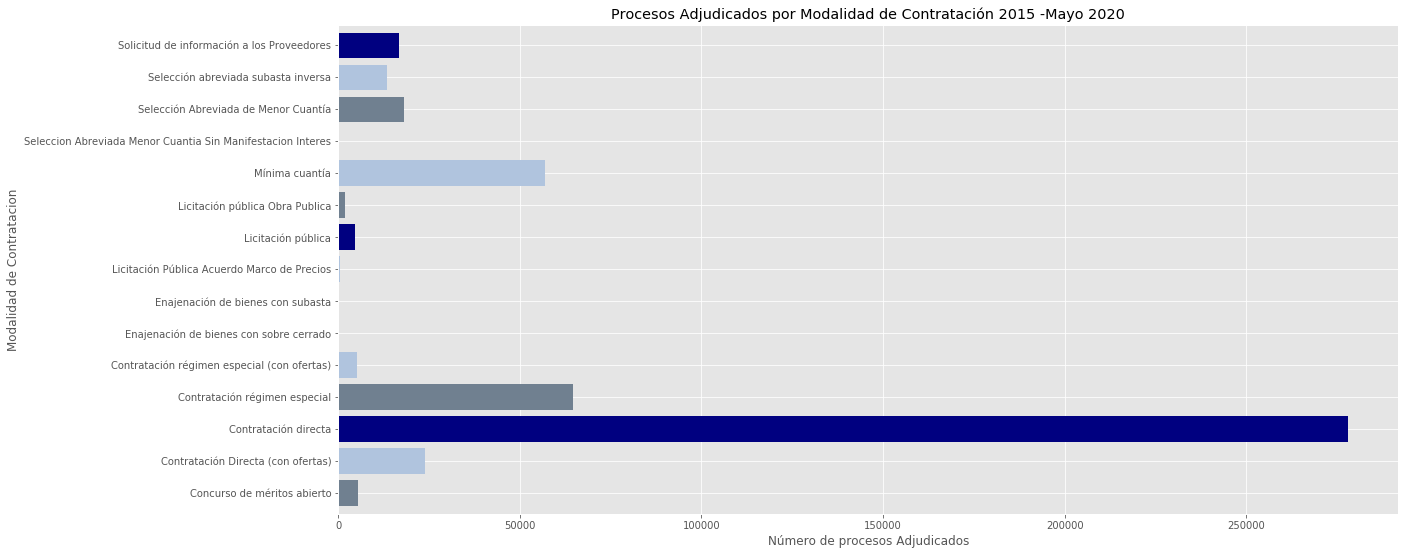

In [10]:
#realizamos un plot de barras horizontal 
plt.title("Procesos Adjudicados por Modalidad de Contratación 2015 -Mayo 2020")
plt.xlabel("Número de procesos Adjudicados")
plt.ylabel("Modalidades de Contratación")
modalidad_contratos_count.plot(kind = 'barh', width=0.8, color = ['slategrey','lightsteelblue','navy']);
plt.savefig("Modalidades.jpg")

In [11]:
# realizamos el mismo analisis pero ahora por tipo de contrato 
bienes_by_contratos = contratos.groupby('Tipo de Contrato')

In [12]:
#agrupamos por tipo de contrato adjudicado 
bienes_contratos_count = bienes_by_contratos['ID Adjudicacion'].agg("count")
bienes_contratos_count

Tipo de Contrato
27 - Otros servicios               23537
Acuerdo Marco                        606
Alquiler de edificios               3886
Arrendamiento Muebles                370
Comisión                              67
Compraventa                        28257
Concesión                             68
Consultoría                         3015
Interventoría                       3293
ND                                 28824
No Especificado                        3
Obra                                8301
Seguros                             1429
Servicios de aprovisionamiento    358726
Suministros                        29653
Ventas de muebles                     68
Name: ID Adjudicacion, dtype: int64

In [13]:
#organizamos de mayor a menor
bienes_contratos_count.to_frame().sort_values(by='ID Adjudicacion', ascending=False)

,ID Adjudicacion
Tipo de Contrato,
Servicios de aprovisionamiento,358726
Suministros,29653
ND,28824
Compraventa,28257
27 - Otros servicios,23537
Obra,8301
Alquiler de edificios,3886
Interventoría,3293
Consultoría,3015


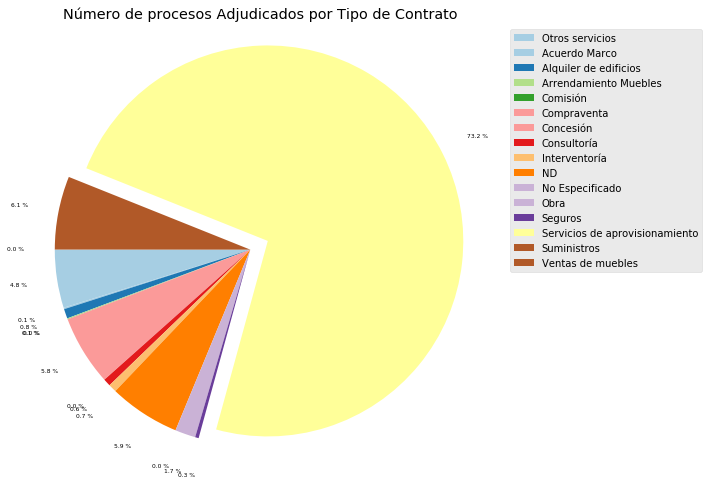

<Figure size 1368x648 with 0 Axes>

In [14]:
#realizamos una gráfica tipo pie, añadiendole porcentajes y tomando un poco por fuera de la torta el tipo de contrato que más se adjudica
explode = (0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,0,0)
labels = ["Otros servicios",
          "Acuerdo Marco",
          "Alquiler de edificios",
          "Arrendamiento Muebles",
          "Comisión",
          "Compraventa",
          "Concesión",
          "Consultoría",
          "Interventoría",
          "ND",
          "No Especificado",
          "Obra",
          "Seguros",
          "Servicios de aprovisionamiento",
          "Suministros",
          "Ventas de muebles"]

bienes_contratos_count.plot(kind = 'pie', autopct="%0.1f %%",cmap='Paired',figsize= (8,8),labels = None ,fontsize=6,explode=explode, startangle=180, pctdistance = 1.2)
plt.ylabel(' ')
plt.legend(labels, bbox_to_anchor=(1.5,1),loc="upper right")
plt.title('Número de procesos Adjudicados por Tipo de Contrato')
plt.axis("equal")
plt.show()
plt.savefig("TipoContrato.jpg")

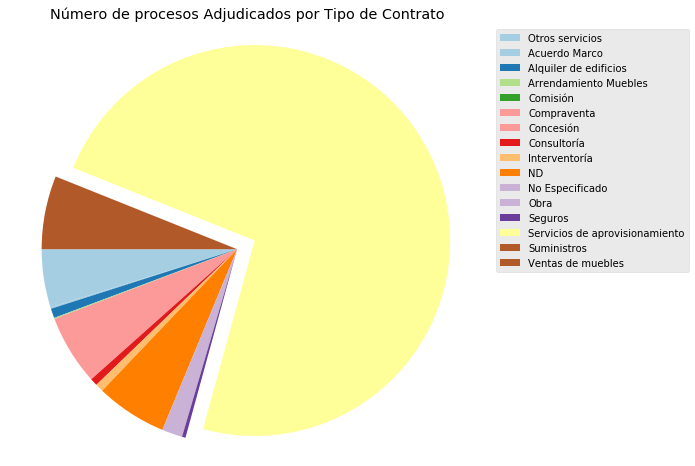

In [15]:
#realizamos el pie sin porcentaje
explode = (0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,0,0)
labels = ["Otros servicios",
          "Acuerdo Marco",
          "Alquiler de edificios",
          "Arrendamiento Muebles",
          "Comisión",
          "Compraventa",
          "Concesión",
          "Consultoría",
          "Interventoría",
          "ND",
          "No Especificado",
          "Obra",
          "Seguros",
          "Servicios de aprovisionamiento",
          "Suministros",
          "Ventas de muebles"]

bienes_contratos_count.plot(kind = 'pie',cmap='Paired',figsize= (8,8),labels = None ,fontsize=8,explode=explode, startangle=180, pctdistance = 1.1)
plt.ylabel(' ')
plt.legend(labels, bbox_to_anchor=(1.5,1),loc="upper right")
plt.title('Número de procesos Adjudicados por Tipo de Contrato')
plt.axis("equal")
plt.savefig("TipoContrato.jpg")
plt.show()

In [16]:
#realizamos el analisis por Departamento 
contratos_by_departamento = contratos.groupby('Departamento Entidad')

In [17]:
#existe una gran cantidad de numero de procesos que no estan definidos por departamento 
#lo que haremos es eliminarlo usando indexación 
departamento_contratos_count = contratos_by_departamento['ID Adjudicacion'].agg("count")
departamento_contratos_count

Departamento Entidad
Amazonas                                      2129
Antioquia                                    22809
Arauca                                        9257
Atlántico                                     5825
Bolívar                                       3506
Boyacá                                        8685
Caldas                                        5277
Caquetá                                       4912
Casanare                                      2904
Cauca                                         3600
Cesar                                         1818
Chocó                                         2361
Cundinamarca                                  9153
Córdoba                                       1290
Distrito Capital de Bogotá                  157380
Guainía                                        158
Guaviare                                       395
Huila                                         9938
La Guajira                                     945
Magdalena 

In [18]:
#una posible forma eliminar el elemento es con la función drop 
departamento_contratos_count.drop(['No Definido'])

Departamento Entidad
Amazonas                                      2129
Antioquia                                    22809
Arauca                                        9257
Atlántico                                     5825
Bolívar                                       3506
Boyacá                                        8685
Caldas                                        5277
Caquetá                                       4912
Casanare                                      2904
Cauca                                         3600
Cesar                                         1818
Chocó                                         2361
Cundinamarca                                  9153
Córdoba                                       1290
Distrito Capital de Bogotá                  157380
Guainía                                        158
Guaviare                                       395
Huila                                         9938
La Guajira                                     945
Magdalena 

In [19]:
#usando indexación, llamamos el elemento con el indice 22 que corresponde al que queremos eliminar, para ello cree la variable departamento 
departamento = departamento_contratos_count.to_frame().drop(departamento_contratos_count.index[22])

In [20]:
#organizamos de mayor a menor
departamento.sort_values(by='ID Adjudicacion', ascending=False)

,ID Adjudicacion
Departamento Entidad,
Distrito Capital de Bogotá,157380
Antioquia,22809
Valle del Cauca,18108
Santander,15635
Huila,9938
Arauca,9257
Cundinamarca,9153
Boyacá,8685
Tolima,5869


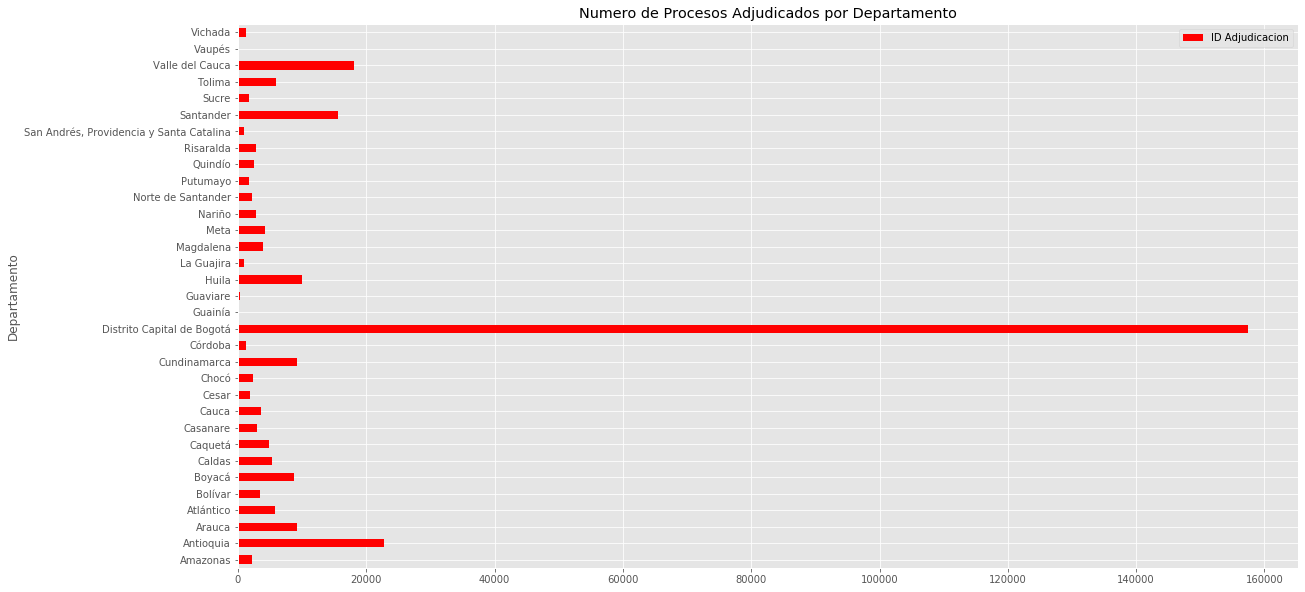

In [21]:
#realizamos la gráfica por departamento 
departamento.plot(kind="barh", color=['red'], figsize= (19.0,10.0))
plt.title("Numero de Procesos Adjudicados por Departamento")
plt.ylabel("Departamento");
plt.savefig("Departamento.jpg")

In [23]:
#vamos analizar el DataFrame por tipo de fecha, para ello utilizamos parse_dates
contratos = pd.read_csv('SECOP_II_-_Procesos_de_Contratacion-2015-2020.csv', parse_dates=["Fecha de Publicacion del Proceso"])

In [24]:
#Invocamos la siguiente funcion con el fin de indicarle al programa que trabajaremos con series de tiempo y temporales 

def to_day(timestamp):
    return timestamp.replace(minute=0,hour=0, second=0)

contratos["Day"] = contratos["Fecha de Publicacion del Proceso"].apply(to_day)

In [25]:
# realizamos una agrupación multiple por modalidad de contrato y fecha de públicacion 
contratos_by_day = contratos.groupby(['Fecha de Publicacion del Proceso','Modalidad de Contratacion']) 
contratos_by_day_count = contratos_by_day['Modalidad de Contratacion'].agg('count') 
contratos_by_day_count

Fecha de Publicacion del Proceso  Modalidad de Contratacion                  
2015-04-16                        Contratación régimen especial                  1
2015-04-20                        Contratación régimen especial                  9
2015-04-21                        Contratación régimen especial                  2
2015-04-22                        Contratación régimen especial                  8
2015-04-23                        Contratación régimen especial                  4
                                                                                ..
2020-05-20                        Contratación régimen especial (con ofertas)    1
                                  Licitación pública                             1
                                  Mínima cuantía                                 4
                                  Selección Abreviada de Menor Cuantía           2
                                  Solicitud de información a los Proveedores     2
Name: Mod

In [26]:
contratos_by_day_count.to_frame()

Modalidad de Contratacion
Fecha de Publicacion del Proceso Modalidad de Contratacion                                             
2015-04-16                       Contratación régimen especial                                        1
2015-04-20                       Contratación régimen especial                                        9
2015-04-21                       Contratación régimen especial                                        2
2015-04-22                       Contratación régimen especial                                        8
2015-04-23                       Contratación régimen especial                                        4
...                                                                                                 ...
2020-05-20                       Contratación régimen especial (con ofertas)                          1
                                 Licitación pública                                                   1
                                 Mínima cuantía                                                       4
                                 Selección Abreviada de Menor Cuantía                                 2
                                 Solicitud de información a los Proveedores                           2

[10718 rows x 1 columns]

In [27]:
#organizamos de manera matricial con unstack 
contratos_by_day_serie = contratos_by_day_count.unstack('Modalidad de Contratacion') 
contratos_by_day_serie

Modalidad de Contratacion,Concurso de méritos abierto,Contratación Directa (con ofertas),Contratación directa,Contratación régimen especial,Contratación régimen especial (con ofertas),Enajenación de bienes con sobre cerrado,Enajenación de bienes con subasta,Licitación Pública Acuerdo Marco de Precios,Licitación pública,Licitación pública Obra Publica,Mínima cuantía,Seleccion Abreviada Menor Cuantia Sin Manifestacion Interes,Selección Abreviada de Menor Cuantía,Selección abreviada subasta inversa,Solicitud de información a los Proveedores
Fecha de Publicacion del Proceso,,,,,,,,,,,,,,,
2015-04-16,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-20,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-21,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-22,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-23,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-16,3.0,5.0,256.0,43.0,2.0,NaN,NaN,NaN,2.0,NaN,20.0,NaN,10.0,4.0,9.0
2020-05-17,NaN,NaN,122.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,4.0
2020-05-18,1.0,20.0,639.0,151.0,5.0,NaN,NaN,NaN,4.0,1.0,125.0,NaN,14.0,10.0,67.0


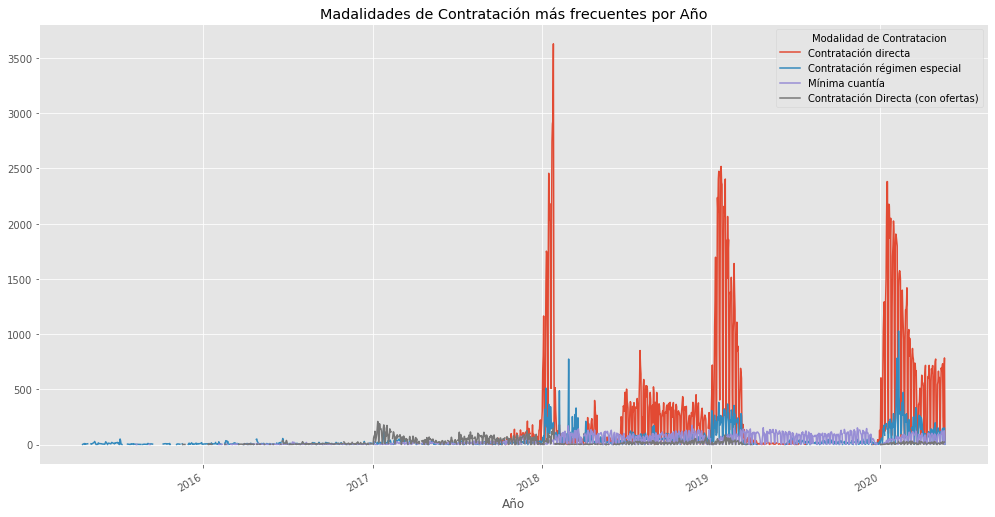

In [28]:
#realizamos la gráfica por madalidades de contratación más concurridas por año
contratos_by_day_serie[['Contratación directa','Contratación régimen especial','Mínima cuantía', 'Contratación Directa (con ofertas)']].plot(figsize= (17.0,9.0))
plt.title("Madalidades de Contratación más frecuentes por Año")
plt.xlabel(' ')
plt.xlabel("Año");
plt.savefig("Contratosporaño.jpg")

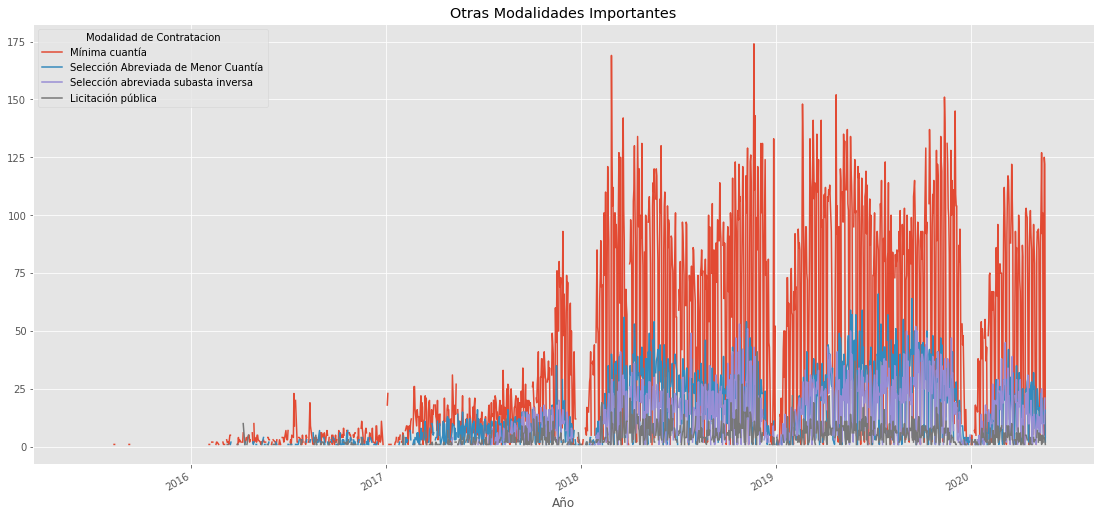

In [29]:
#realizamos otra gráfica por otras modalidades de contratación importantes 
contratos_by_day_serie[['Mínima cuantía','Selección Abreviada de Menor Cuantía','Selección abreviada subasta inversa','Licitación pública']].plot();
plt.title("Otras Modalidades Importantes")
plt.xlabel(' ')
plt.xlabel("Año");
plt.savefig("otrasporaño.jpg")

In [30]:
#realizamos en análisis por Modalidad de Contratación y Orden de la Entidad Compradora o Estatal.
contratos_by_orden_entidad = contratos.groupby(['Modalidad de Contratacion','OrdenEntidad',]) 
contratos_by_orden_entidad = contratos_by_orden_entidad ['Modalidad de Contratacion'].agg('count') 
contratos_by_orden_entidad

Modalidad de Contratacion                                    OrdenEntidad        
Concurso de méritos abierto                                  Corporación Autónoma        94
                                                             Nacional                  2806
                                                             Territorial               2508
Contratación Directa (con ofertas)                           Corporación Autónoma        31
                                                             Nacional                 16228
                                                             Territorial               7618
Contratación directa                                         Corporación Autónoma      1660
                                                             Nacional                151745
                                                             Territorial             124526
Contratación régimen especial                                Corporación Autónoma      325

In [31]:
#realizamos el DataFrame, en el cual se evidencia la cantidad de procesos por Modalidad y orden de la Entidad Estatal
contratos_by_orden_entidad.to_frame()

Modalidad de Contratacion
Modalidad de Contratacion                          OrdenEntidad                                   
Concurso de méritos abierto                        Corporación Autónoma                         94
                                                   Nacional                                   2806
                                                   Territorial                                2508
Contratación Directa (con ofertas)                 Corporación Autónoma                         31
                                                   Nacional                                  16228
                                                   Territorial                                7618
Contratación directa                               Corporación Autónoma                       1660
                                                   Nacional                                 151745
                                                   Territorial                              124526
Contratación régimen especial                      Corporación Autónoma                       3252
                                                   Nacional                                  22645
                                                   Territorial                               38688
Contratación régimen especial (con ofertas)        Corporación Autónoma                         21
                                                   Nacional                                   1193
                                                   Territorial                                3881
Enajenación de bienes con sobre cerrado            Nacional                                     26
                                                   Territorial                                   5
Enajenación de bienes con subasta                  Corporación Autónoma                         15
                                                   Nacional                                     28
                                                   Territorial                                   5
Licitación Pública Acuerdo Marco de Precios        Nacional                                    596
Licitación pública                                 Corporación Autónoma                         77
                                                   Nacional                                   2701
                                                   Territorial                                1926
Licitación pública Obra Publica                    Corporación Autónoma                          8
                                                   Nacional                                    959
                                                   Territorial                                 990
Mínima cuantía                                     Corporación Autónoma                        234
                                                   Nacional                                  45220
                                                   Territorial                               11545
Seleccion Abreviada Menor Cuantia Sin Manifesta... Corporación Autónoma                          6
                                                   Nacional                                    147
                                                   Territorial                                 152
Selección Abreviada de Menor Cuantía               Corporación Autónoma                        182
                                                   Nacional                                  13457
                                                   Territorial                                4548
Selección abreviada subasta inversa                Corporación Autónoma                        102
                                                   Nacional                                   9400
                                                   Territorial                                4038
Solicitud de i

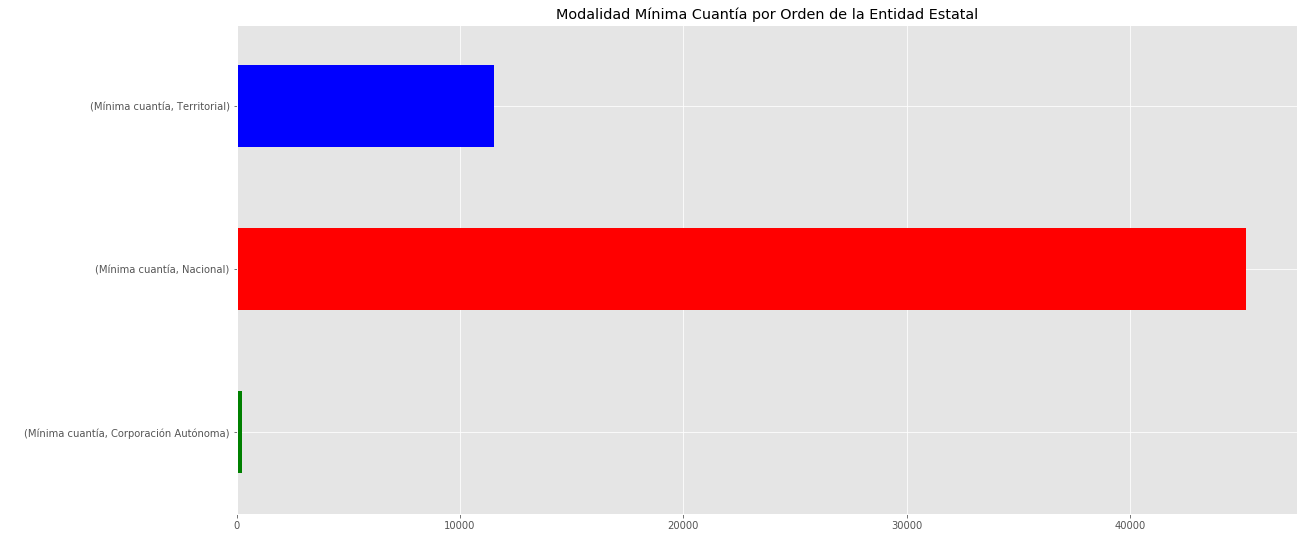

In [32]:
#gráficamos las más importantes 
ax1= contratos_by_orden_entidad[['Mínima cuantía']].plot(kind ='barh', color=['g','r','b'])
plt.title("Modalidad Mínima Cuantía por Orden de la Entidad Estatal")
plt.ylabel(' ')
plt.savefig("minima_orden.jpg")

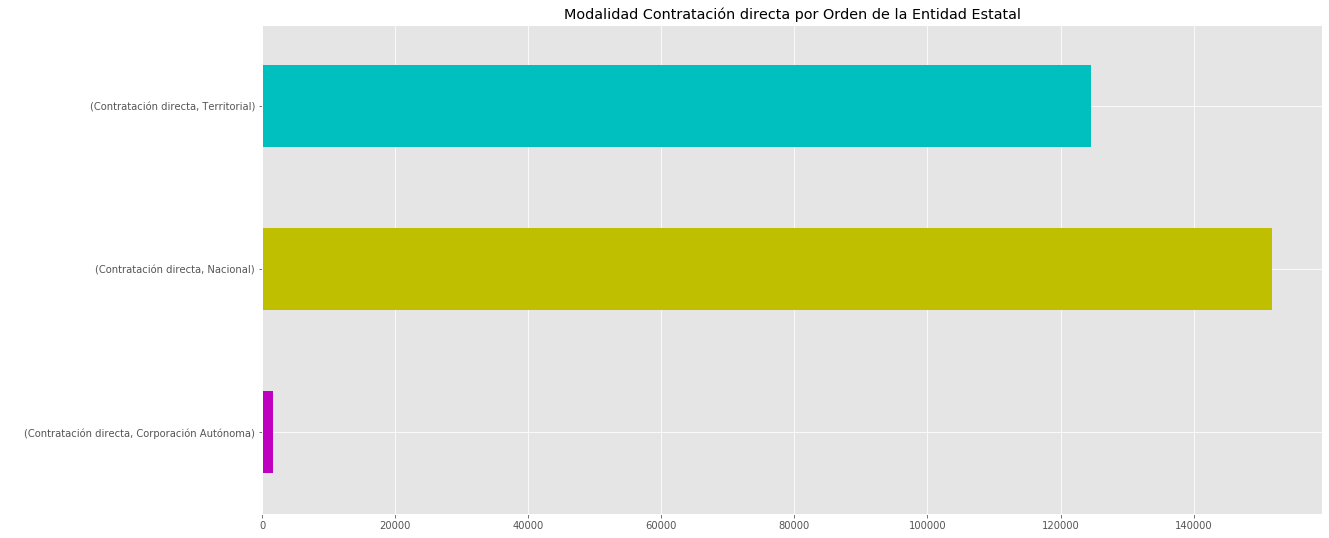

In [33]:
ax2= contratos_by_orden_entidad[['Contratación directa']].plot(kind ='barh', color=['m','y','c'])
plt.title("Modalidad Contratación directa por Orden de la Entidad Estatal")
plt.ylabel(' ')
plt.savefig("directa_orden.jpg")

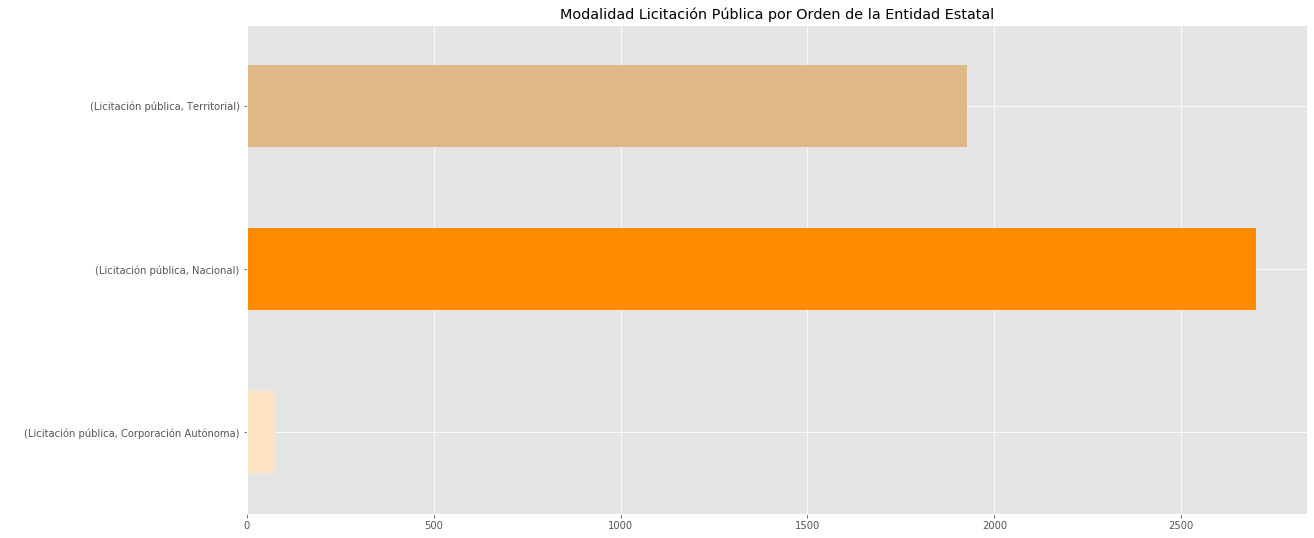

In [34]:
ax3= contratos_by_orden_entidad[['Licitación pública']].plot(kind ='barh', color=['bisque','darkorange','burlywood'])
plt.title("Modalidad Licitación Pública por Orden de la Entidad Estatal")
plt.ylabel(' ')
plt.savefig("licitacion_orden.jpg")

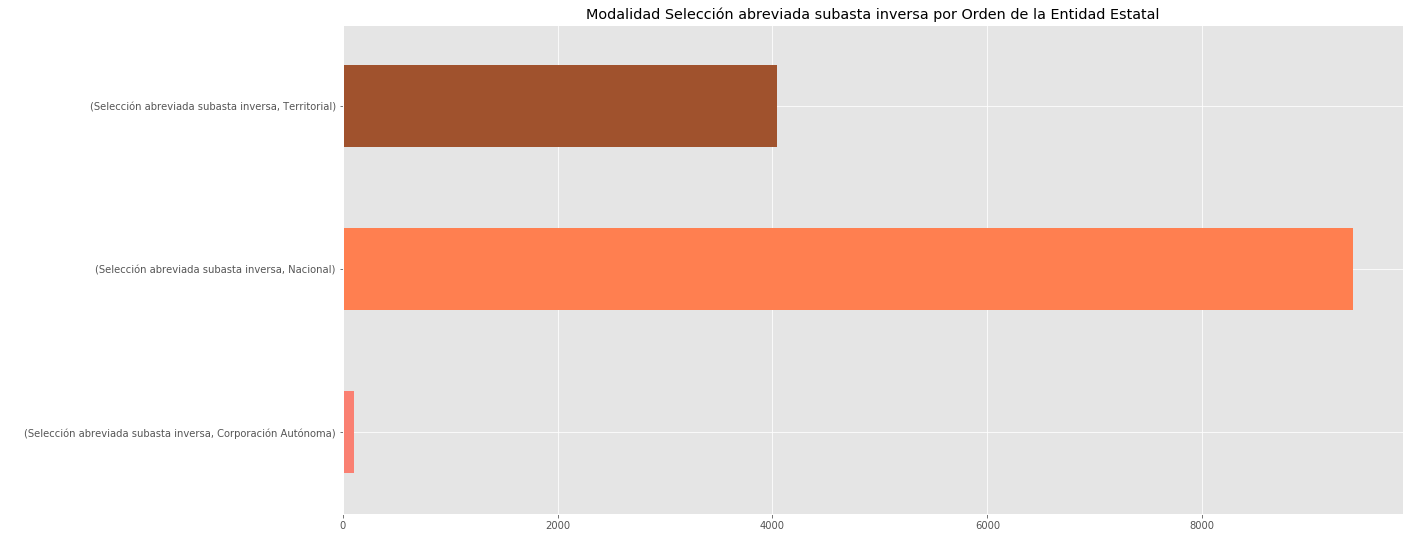

In [35]:
ax4= contratos_by_orden_entidad[['Selección abreviada subasta inversa']].plot(kind ='barh', color=['salmon','coral','sienna'])
plt.title("Modalidad Selección abreviada subasta inversa por Orden de la Entidad Estatal")
plt.ylabel(' ')
plt.savefig("subasta_orden.jpg")

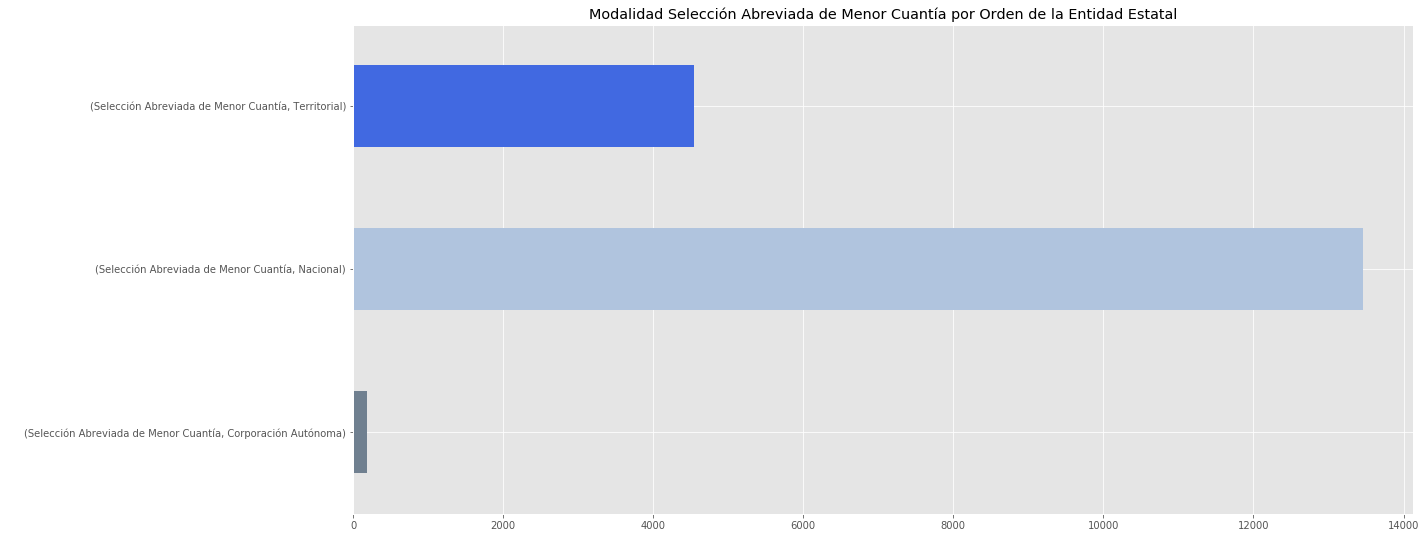

In [36]:
ax5 = contratos_by_orden_entidad[['Selección Abreviada de Menor Cuantía']].plot(kind ='barh', color=['slategrey','lightsteelblue','royalblue'])
plt.title("Modalidad Selección Abreviada de Menor Cuantía por Orden de la Entidad Estatal")
plt.ylabel(' ')
plt.savefig("abreviada_orden.jpg")

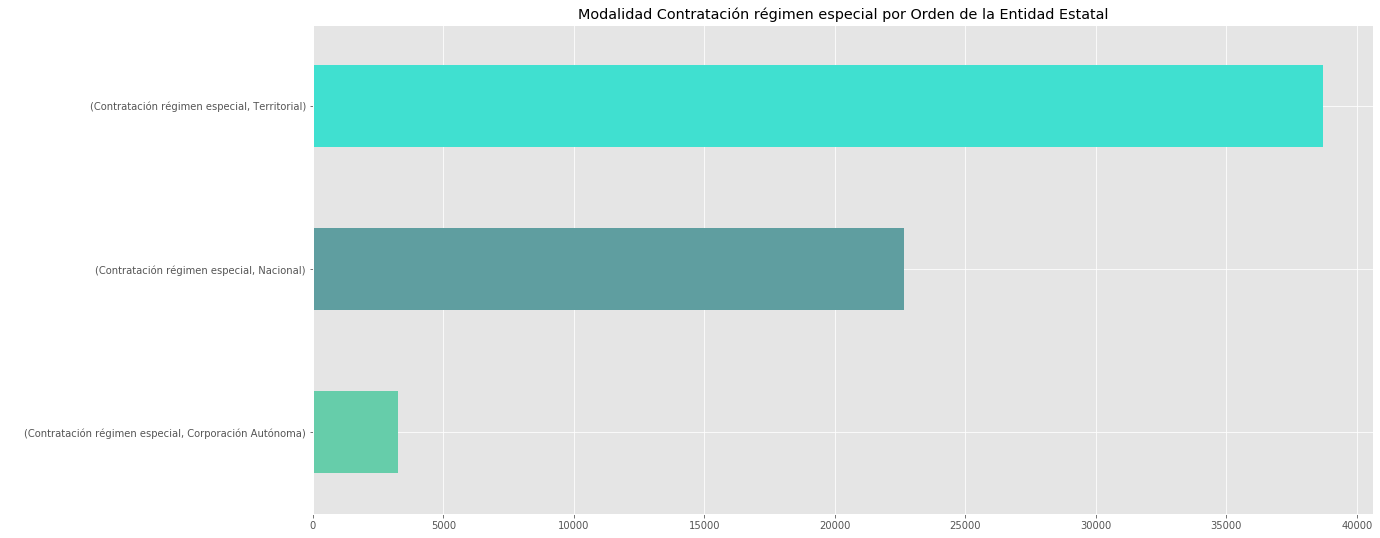

In [37]:
ax6 = contratos_by_orden_entidad[['Contratación régimen especial']].plot(kind ='barh', color=['mediumaquamarine','cadetblue','turquoise'])
plt.title("Modalidad Contratación régimen especial por Orden de la Entidad Estatal")
plt.ylabel(' ')
plt.savefig("especial_orden.jpg")

In [38]:
#realizamos el análisis por el Monto total adjudicado por Modalidad de Contratación 
#cambiamos el nombre de la columana 'Valor Total Adjudicacion' por 'Monto'
contratos.rename(columns={'Valor Total Adjudicacion':'Monto'}, inplace=True)

In [39]:
#el formato original csv presenta los montos separados por coma, es necesario cambiarlos 
contratos['Monto'] = contratos['Monto'].str.replace(",","")

In [40]:
#realizamos la siguiente conversion 
contratos['Monto'] = pd.to_numeric(contratos.Monto, errors='coerce')

In [41]:
#una vez el ajuste, realizamos el análisis por Modalidad de contratación y Monto total por cada una.
contratos_by_monto_modalidad = contratos.groupby(['Modalidad de Contratacion'])

In [42]:
#sumamos los montos adjudicados por modalidad (sum)
contratos_by_monto = contratos_by_monto_modalidad['Monto'].agg(sum)
contratos_by_monto

Modalidad de Contratacion
Concurso de méritos abierto                                        2920585046698
Contratación Directa (con ofertas)                               146899615328689
Contratación directa                                                           0
Contratación régimen especial                                                  0
Contratación régimen especial (con ofertas)                    22748679920630048
Enajenación de bienes con sobre cerrado                                192507588
Enajenación de bienes con subasta                                     4351183066
Licitación Pública Acuerdo Marco de Precios                          49994368088
Licitación pública                                                19512161048230
Licitación pública Obra Publica                                   10440596652153
Mínima cuantía                                                     1931810200893
Seleccion Abreviada Menor Cuantia Sin Manifestacion Interes        1246686868942
Se

In [43]:
#realizamos el Dataframe
contratos_by_monto.to_frame()

,Monto
Modalidad de Contratacion,
Concurso de méritos abierto,2920585046698
Contratación Directa (con ofertas),146899615328689
Contratación directa,0
Contratación régimen especial,0
Contratación régimen especial (con ofertas),22748679920630048
Enajenación de bienes con sobre cerrado,192507588
Enajenación de bienes con subasta,4351183066
Licitación Pública Acuerdo Marco de Precios,49994368088
Licitación pública,19512161048230


In [44]:
#organizamos el DataFrame de Mayor a Menor 
contratos_by_monto.to_frame().sort_values(by='Monto', ascending=False)

,Monto
Modalidad de Contratacion,
Contratación régimen especial (con ofertas),22748679920630048
Contratación Directa (con ofertas),146899615328689
Licitación pública,19512161048230
Licitación pública Obra Publica,10440596652153
Selección Abreviada de Menor Cuantía,5202693035764
Selección abreviada subasta inversa,4207361341621
Concurso de méritos abierto,2920585046698
Mínima cuantía,1931810200893
Seleccion Abreviada Menor Cuantia Sin Manifestacion Interes,1246686868942


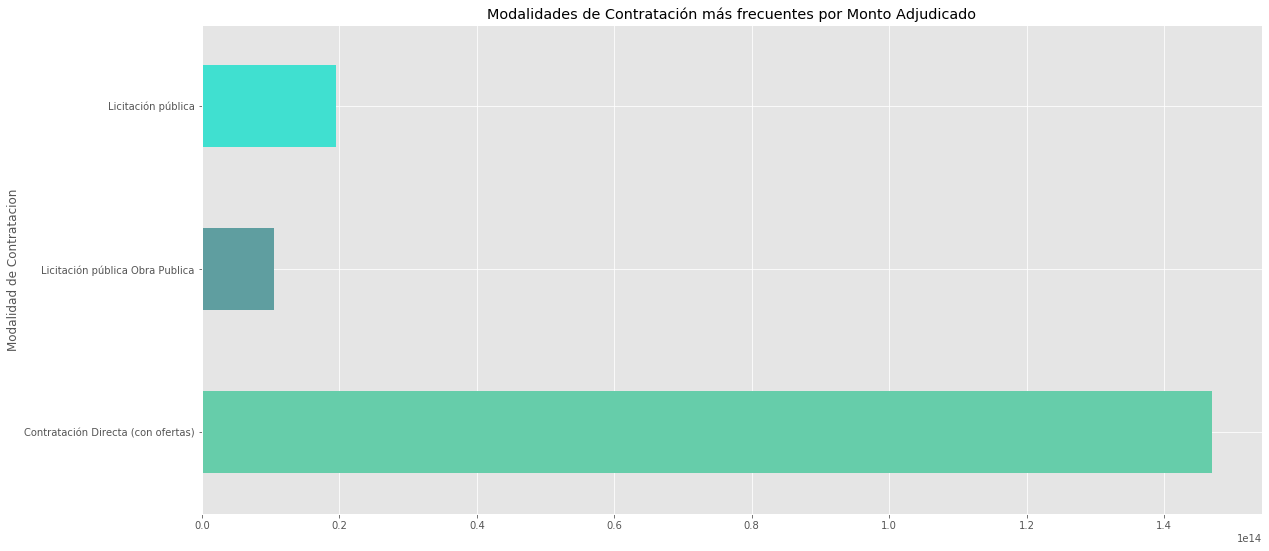

In [45]:
contratos_by_monto[['Contratación Directa (con ofertas)','Licitación pública Obra Publica','Licitación pública']].plot(kind ='barh', color=['mediumaquamarine','cadetblue','turquoise'])
plt.title("Modalidades de Contratación más frecuentes por Monto Adjudicado")
plt.savefig("monto_modalidad.jpg")

## Análisis de Redes 

In [1]:
#importamos la libreria networkx que nos servira para la estructuracion de las redes y matplotlib para graficarla. 
import networkx as nx
import matplotlib.pyplot as plt


## Red Nacional - Entidad - Proveedores 

In [ ]:
e = open('redenacionaltxt')
G = nx.read_adjlist(e)

#G = nx.dodecahedral_graph()
nx.draw(G,pos=nx.spring_layout(G), node_color='g', linewidths = 1.0, style='solid',font_size = 10, font_family = 'sans-serif', default=True ,node_size = 400)
fig = plt.figure(figsize=(20.0,150))
plt.show()

## Red Territorial - Entidad - Proveedores

In [ ]:
e = open('redterritorial.txt')
G = nx.read_adjlist(e)

#G = nx.dodecahedral_graph()
nx.draw(G,pos=nx.spring_layout(G), node_color='g', linewidths = 1.0, style='solid',font_size = 10, font_family = 'sans-serif', default=True ,node_size = 400)
fig = plt.figure(figsize=(20.0,150))
plt.show()

## Red Ejercito Nacional - Proveedores 

In [ ]:
e = open('redejercito.txt')
G = nx.read_adjlist(e)

#G = nx.dodecahedral_graph()
nx.draw(G,pos=nx.spring_layout(G), node_color='g', linewidths = 1.0, style='solid',font_size = 10, font_family = 'sans-serif', default=True ,node_size = 400)
fig = plt.figure(figsize=(20.0,150))
plt.show()

Nota: por temas de visualización más rapida, lo podemos correr el spyder. 